In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Let's start by looking at the first few rows of the training and test dataframes to get a sense of their structure and content.

In [ ]:
print("First 5 rows of the training data:")
display(train.head())

print("\nFirst 5 rows of the test data:")
display(test.head())

First 5 rows of the training data:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert



First 5 rows of the test data:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


Now, let's look at the descriptive statistics for the numerical columns in both dataframes to understand the distribution of values.

In [ ]:
print("Descriptive statistics for the training data:")
display(train.describe())

print("\nDescriptive statistics for the test data:")
display(test.describe())

Descriptive statistics for the training data:


,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000



Descriptive statistics for the test data:


,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,6175.000000,5750.000000,5778.000000,5709.000000,5825.000000,5767.000000
mean,21611.000000,3.116870,5.287989,4.037835,8.008412,5.028958
std,1782.713288,2.985658,2.758052,2.045207,4.192701,2.867285
min,18524.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20067.500000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,21611.000000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,23154.500000,4.000000,8.000000,6.000000,12.000000,7.000000
max,24698.000000,11.000000,10.000000,7.000000,15.000000,10.000000


Next, let's check the data types of each column and identify any missing values.

In [ ]:
print("Data types and missing values in the training data:")
display(train.info())

print("\nData types and missing values in the test data:")
display(test.info())

Data types and missing values in the training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


None


Data types and missing values in the test data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


None

In [ ]:
'''
# Define discrete numeric columns
numeric_cols = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

# Convert known placeholders to np.nan (if needed)
train[numeric_cols] = train[numeric_cols].replace(['NA', 'N/A', 'na', 'n/a', -1], np.nan)

# You can also explicitly fill any remaining missing values (though np.nan won't change existing NaNs)
train[numeric_cols] = train[numeric_cols].fillna(np.nan)
'''


"\n# Define discrete numeric columns\nnumeric_cols = [\n    'Time_spent_Alone',\n    'Social_event_attendance',\n    'Going_outside',\n    'Friends_circle_size',\n    'Post_frequency'\n]\n\n# Convert known placeholders to np.nan (if needed)\ntrain[numeric_cols] = train[numeric_cols].replace(['NA', 'N/A', 'na', 'n/a', -1], np.nan)\n\n# You can also explicitly fill any remaining missing values (though np.nan won't change existing NaNs)\ntrain[numeric_cols] = train[numeric_cols].fillna(np.nan)\n"

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
numeric_cols = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

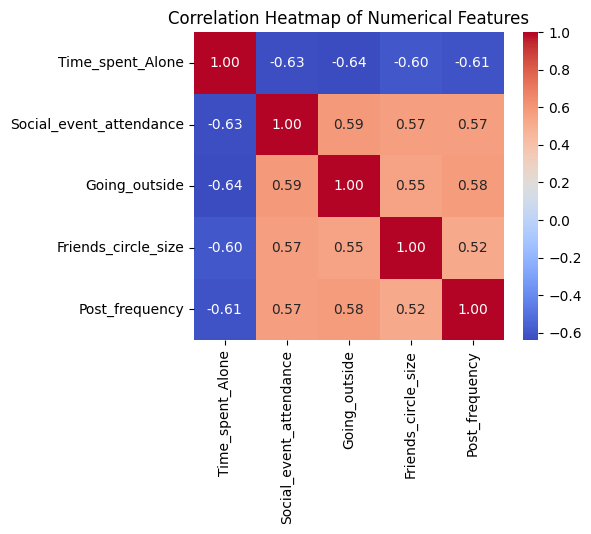

In [ ]:
a=train[numeric_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(a, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Let's visualize the distribution of categorical features using bar charts.

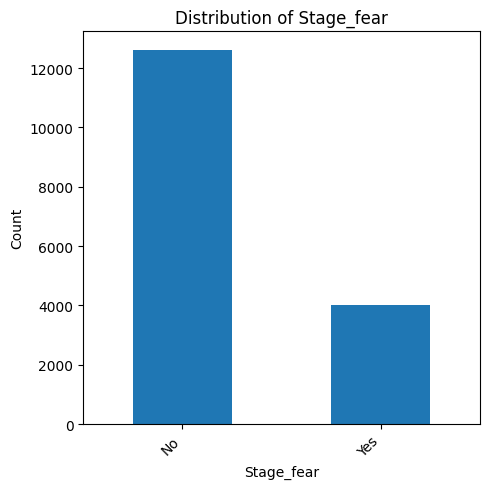

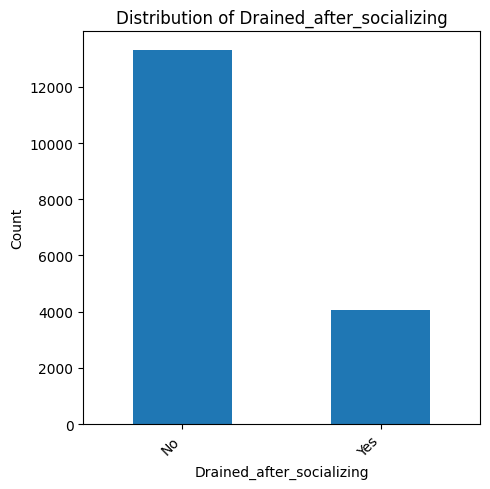

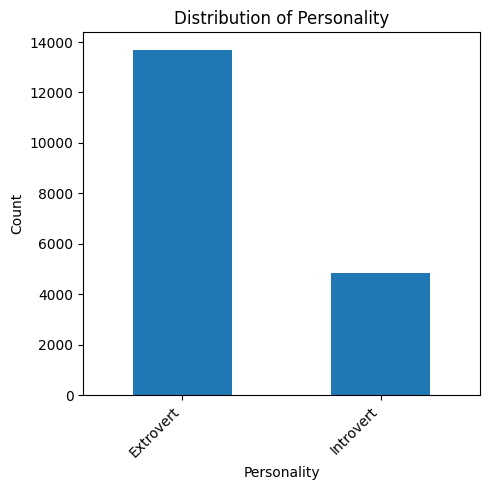

In [ ]:
# Get object type columns
object_cols = train.select_dtypes(include='object').columns

# Create bar charts for object columns
for col in object_cols:
    plt.figure(figsize=(5,5))
    train[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Now, let's visualize the distribution of numerical features using pie charts.

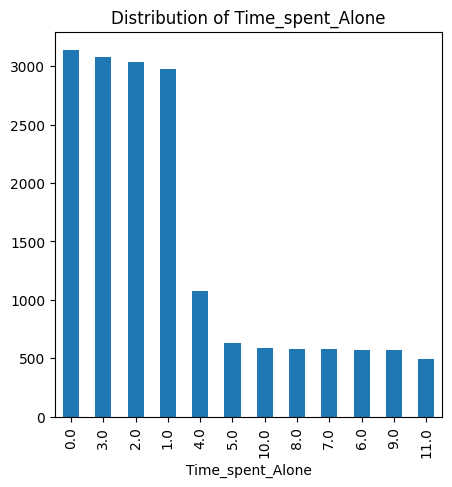

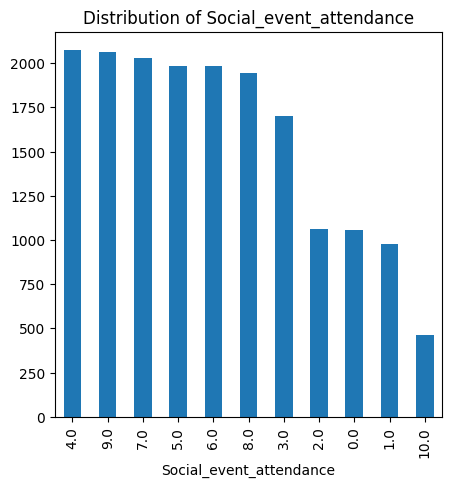

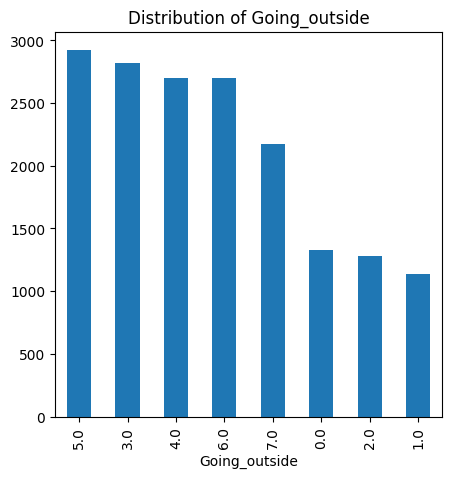

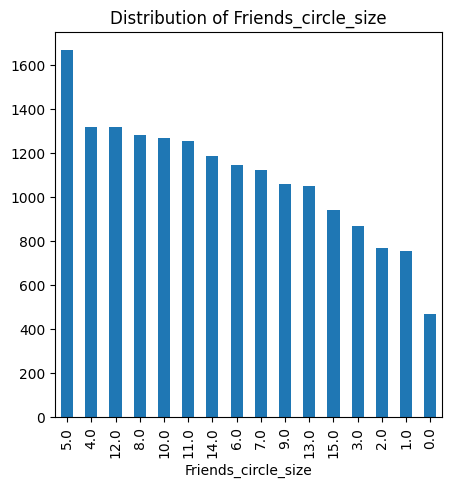

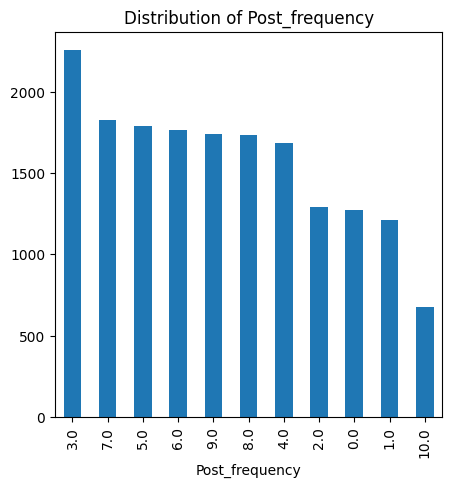

In [ ]:
# Get float type columns
float_cols = train.select_dtypes(include='float64').columns

# Create pie charts for float columns
for col in float_cols:
    plt.figure(figsize=(5,5))
    train[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('') # Remove the default ylabel
    plt.show()

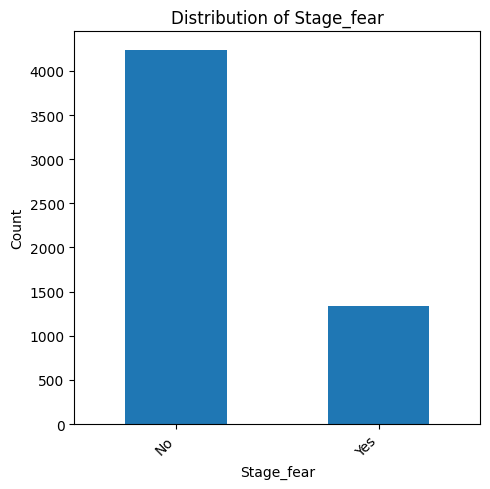

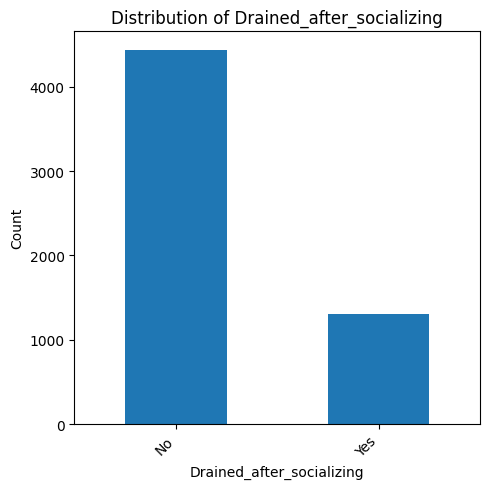

In [ ]:
object_columns=test.select_dtypes(include='object').columns

for col in object_columns:
  plt.figure(figsize=(5,5))
  test[col].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

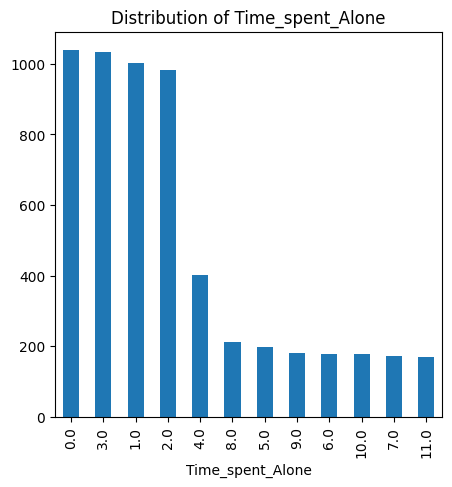

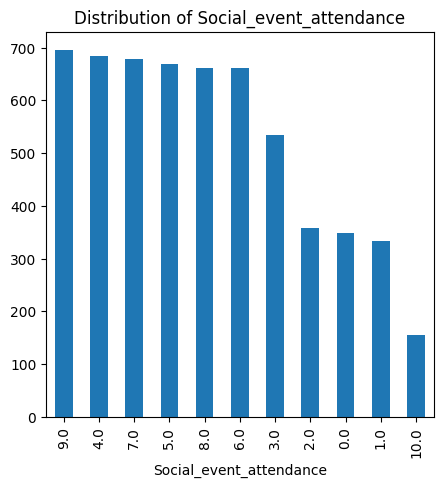

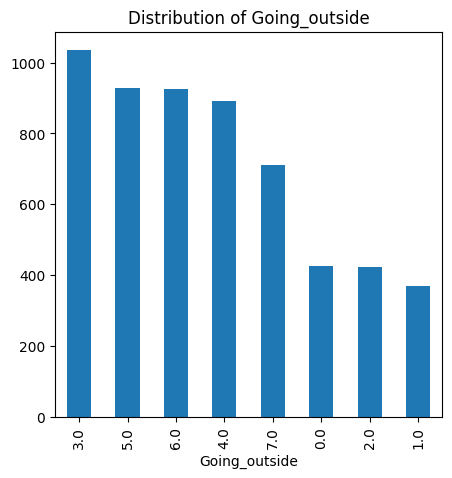

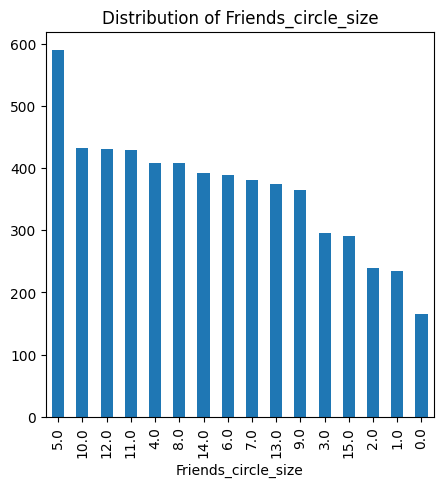

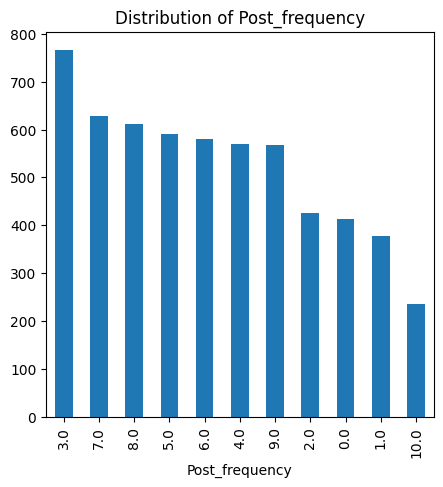

In [ ]:
discrete_col=test.select_dtypes(include='float64').columns

for col in discrete_col:
  plt.figure(figsize=(5,5))
  test[col].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {col}')
  plt.ylabel('') # Remove the default ylabel
  plt.show()

In [ ]:
#imputing the numeric columns in train and test
train[float_cols]=train[float_cols].fillna(train[float_cols].median())
test[discrete_col]=test[discrete_col].fillna(test[discrete_col].median())


In [ ]:
#imputing the object columns in both train and test
for col in object_cols:
    if train[col].isnull().any():
        train[col] = train[col].fillna(train[col].mode()[0])


for col in object_columns:
    if test[col].isnull().any():
        test[col] = test[col].fillna(test[col].mode()[0])

In [ ]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression

In [ ]:
print(train['Personality'].value_counts())
print(train['Personality'].value_counts(normalize=True))

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64
Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64


the personality ratio is okay enough to create a model

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train['Stage_fear']=le.fit_transform(train['Stage_fear'].astype(str))
train['Drained_after_socializing']=le.fit_transform(train['Drained_after_socializing'].astype(str))

for col in object_columns:
  test[col]=le.fit_transform(test[col].astype(str))

In [ ]:
#Here, StandardScalar has not be used which ic why the score is low.

X=train.drop(columns=['Personality'])
y=train['Personality']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test,y_pred))

Accuracy: 0.9689608636977058
              precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2753
   Introvert       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X=train.drop(columns=['Personality'])
y=train['Personality']

scalar=StandardScaler()#scale

X_scale=scalar.fit_transform(X)#train
x_scale=scalar.transform(test)#test

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_scale,y,test_size=0.2,random_state=42)

model=LogisticRegression()

model.fit(X_train,y_train)#fitting the model in Xtrain and ytrain

predict=model.predict(X_val)#predicting the model at Xval
print(predict)

accuracy_score(predict,y_val)

['Extrovert' 'Extrovert' 'Extrovert' ... 'Extrovert' 'Extrovert'
 'Extrovert']


0.968421052631579

In [ ]:
print(classification_report(predict,y_val))

              precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2770
   Introvert       0.93      0.95      0.94       935

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



RandomForest

In [ ]:
X=train.drop(columns=['Personality'])
y=train['Personality']

scalar=StandardScaler() #scaling the data

X_scale=scalar.fit_transform(X)#train
x_scale=scalar.transform(test)#test

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_scale,y,test_size=0.2,random_state=42)

model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42,n_jobs=-1)

model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
model.fit(X_train,y_train)

y_pred=model.predict(X_val)

print(accuracy_score(y_pred,y_val))
print(classification_report(predict,y_val))

0.968421052631579
              precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2770
   Introvert       0.93      0.95      0.94       935

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [ ]:
y_test_pred = model.predict(x_scale)
test_pred=pd.DataFrame({'id':test.id,'Personality':y_test_pred}).to_csv('submission.csv',index=False)


In [ ]:
test_pred=pd.read_csv('submission.csv')
test_pred

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [ ]:
'''
output = pd.DataFrame({'id': test.id, 'Personalities': predict})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

sub=pd.read_csv("submission.csv")
sub
'''

'\noutput = pd.DataFrame({\'id\': test.id, \'Personalities\': predict})\noutput.to_csv(\'submission.csv\', index=False)\nprint("Your submission was successfully saved!")\n\nsub=pd.read_csv("submission.csv")\nsub\n'